**Advance Data Science and Architecture**

**Assignment 1** **-** **K-Means Clustering**

**Name** - **Ronak Bhushan Patil**

**NUID** - **001007035**

**Abstract**

In this notebook, we used the dataset On-line Retail to investigate customer segmentation utilizing the fun challenge of unsupervised learning. The aim of the notebook is to create a k-means clustering algorithm without using any machine learning libraries.

# **Importing Libraries**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.cm as cm
import os as os

%matplotlib inline

In [82]:
pwd

'/content'

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Uploading and Reading the Dataset**

In [84]:
retail = pd.read_excel('/content/drive/MyDrive/Dataset/OnlineRetail.xlsx')

In [85]:
print(retail.shape)

(541909, 8)


**The dataset has 541909 observations in it and 8 columns which is a mix between categorical and numeric values.**

In [86]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Data Preprocessing and Cleaning**

In [87]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [88]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**From the above describe function we can infer below few points** 

*   The min value for Quantity and Unit Price are negative
*   The average number of quantity of product customer buys are 9 and have mean value approx 4 for Unit Price

In [89]:
print('Check to see whether there were any negative quantities or prices at the same register:',
     'No' if retail[(retail.Quantity<0) & (retail.UnitPrice<0)].shape[0] == 0 else 'Yes', '\n')
print('Check to see how many registers we have with a negative quantity',
      'and prices is 0 or vice-versa:',
      retail[(retail.Quantity<=0) & (retail.UnitPrice<=0)].shape[0])
print('\nAll register with negative quantity has Invoice start with:', 
      retail.loc[(retail.Quantity<0) & ~(retail.CustomerID.isnull()), 'InvoiceNo'].apply(lambda x: x[0]).unique())
print('\nSee an example of a negative quantity record, as well as additional records linked to it:')
display(retail[(retail.CustomerID==12472) & (retail.StockCode==22244)])

Check to see whether there were any negative quantities or prices at the same register: No 

Check to see how many registers we have with a negative quantity and prices is 0 or vice-versa: 1336

All register with negative quantity has Invoice start with: ['C']

See an example of a negative quantity record, as well as additional records linked to it:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1973,C536548,22244,3 HOOK HANGER MAGIC GARDEN,-4,2010-12-01 14:33:00,1.95,12472.0,Germany
9438,537201,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-05 14:19:00,1.95,12472.0,Germany
121980,546843,22244,3 HOOK HANGER MAGIC GARDEN,12,2011-03-17 12:40:00,1.95,12472.0,Germany


In [90]:
print('Check the register for a negative UnitPrice:')
display(retail[(retail.UnitPrice<0)])
print("Sales records with Customer ID and zero in Unit Price:",retail[(retail.UnitPrice==0)  & ~(retail.CustomerID.isnull())].shape[0])
retail[(retail.UnitPrice==0)  & ~(retail.CustomerID.isnull())]

Check the register for a negative UnitPrice:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Sales records with Customer ID and zero in Unit Price: 40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


**There are no records in which both quantity and price are negative, however there are entries in which one is and the other is 0. However, we do not have the customer ID for any of these data. As a result, we infer that we can delete all entries in that quantity or price, as well as all negative data.**

**Checking the number of missing data values**

In [91]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

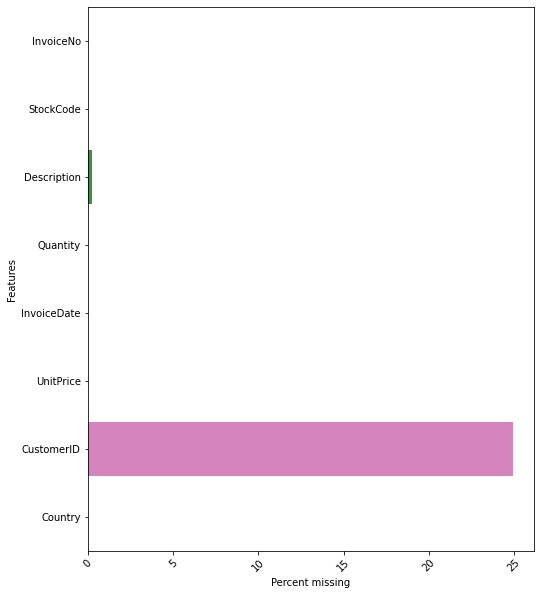

In [92]:
null_values = retail.isnull().sum()/len(retail)*100
null_vals = pd.DataFrame(null_values)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Features", "Percent missing"]
plt.figure(figsize= (8,10))
plt.xticks(rotation = 45)
sns.barplot(x = "Percent missing", y = "Features", data = null_vals, orient = "h")

### Dropping null values

In [93]:
retail_1 = retail.dropna(subset = ["CustomerID","Description"])
print(retail.shape,retail_1.shape)

(541909, 8) (406829, 8)


### Dropping duplicate values

In [94]:
retail_2 = retail_1.drop_duplicates()
print(retail_2.shape)

(401604, 8)


### Choosing necessary columns 

In [95]:
retail_3 = retail_2 [ ['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
print(retail_3.shape)
retail_3.head(3)

(401604, 5)


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39
2,17850.0,2010-12-01 08:26:00,536365,8,2.75


# **Feature Engineering**

In [96]:
retail_3['TotalPrice'] = retail_3['Quantity'] * retail_3['UnitPrice']
print(retail_3.shape)
retail_3.head(3)

(401604, 6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00


### **Total Price column can be generated using the product of already present features such as Quantity and Unit Price**

# **RFM Model**

### **We will utilize an RFM,Recency, Frequency, and Monetary Value, based model of customer value to determine our customer groups because our dataset is confined to sales records and does not include any other information about our customers. The RFM model will analyze a customer's transactions and determine three key informative qualities about them:**
### **Recency: The value of how recently a customer purchased**

### **Frequency: How frequent the customer’s transactions are done**

### **Monetary: The value of all the transactions that the customer made**


### Printing earliest and latest dates in the data

In [97]:
print('Min:{}, Max:{}'.format(retail_3['InvoiceDate'].min(), retail_3['InvoiceDate'].max()))

Min:2010-12-01 08:26:00, Max:2011-12-09 12:50:00


**We must first choose a reference date for our study before we can generate the recency feature variable.**

### Creating a reference date for analysis (Next date of the maximum date) 

In [98]:
current_date = dt.datetime(2011,12,10)
current_date

datetime.datetime(2011, 12, 10, 0, 0)

### Calculate Recency, Frequency, Monetary for all customers

In [99]:
retail_4 = retail_3.groupby(['CustomerID']).agg({ 'InvoiceDate': lambda x: (current_date - x.max()).days, 'InvoiceNo': 'count',
'TotalPrice': 'sum'})
retail_4.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency','TotalPrice': 'Monetary'}, inplace=True)
print(retail_4.shape)
retail_4.head(3)

(4372, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24


### Removing zero values 

In [100]:
retail_5 = retail_4[(retail_4 > 0).all(1)]
print(retail_5.shape)
retail_5.head(3)

(4284, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55


In [101]:
retail_5.describe()

,Recency,Frequency,Monetary
count,4284.000000,4284.000000,4.284000e+03
mean,90.673436,90.187675,1.802891e+03
std,99.212825,217.749044,7.226246e+03
min,1.000000,1.000000,1.776357e-15
25%,17.000000,18.000000,2.988725e+02
50%,50.000000,42.000000,6.467200e+02
75%,140.000000,99.000000,1.596963e+03
max,373.000000,7812.000000,2.794890e+05


### Plotting the distribution graph

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


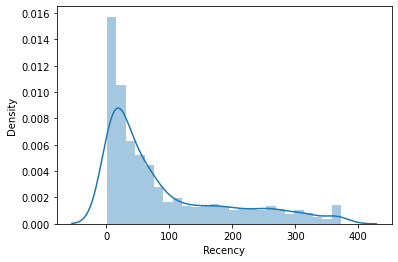

In [102]:
sns.distplot(retail_5['Recency'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


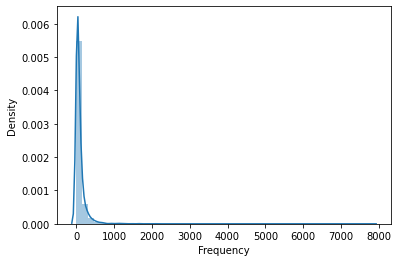

In [103]:
sns.distplot(retail_5['Frequency'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


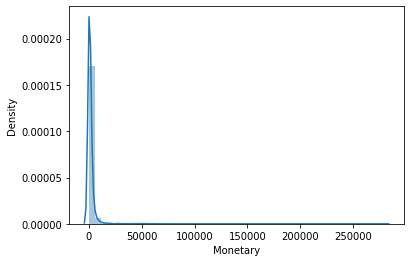

In [104]:
sns.distplot(retail_5['Monetary'])

**We can see that all the distribution graphs are right skewed. Inorder to handle the skewness we need to perform log transformation**

### Normalizing skewness using Log Transform

In [105]:
online_retail = np.log(retail_5 + 1)
print(online_retail.shape)
online_retail.head(3)

(4284, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1.098612,5.209486,8.368925
12348.0,4.330733,3.465736,7.494564
12349.0,2.944439,4.304065,7.472245


### Plotting the distribution graph after Log Transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


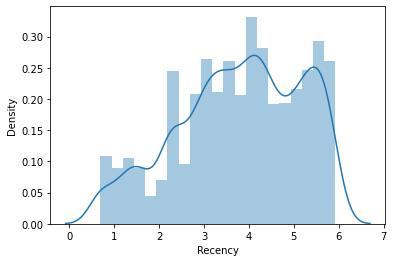

In [106]:
sns.distplot(online_retail['Recency'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


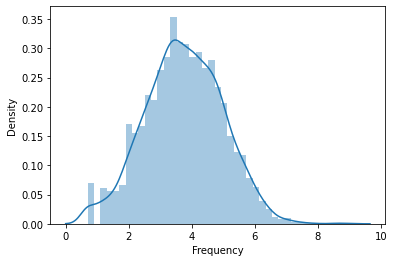

In [107]:
sns.distplot(online_retail['Frequency'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


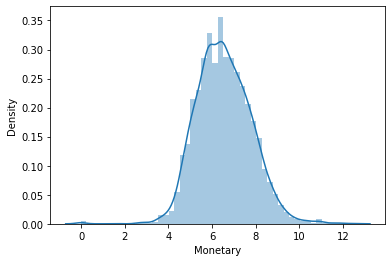

In [108]:
sns.distplot(online_retail['Monetary'])

**The distribution are normalized and we can see Frequency and Monetary are normally distributed**

# **K Means Clustering Without Using Library**

In [111]:
def kmeans(K,online_retail):
    Centroids = (online_retail.sample(n=K))
    plt.scatter(online_retail["Frequency"],online_retail["Monetary"],c='black')
    plt.scatter(Centroids["Frequency"],Centroids["Monetary"],c='red')
    plt.xlabel('Frequency')
    plt.ylabel('Monetary')
    plt.show()
    diff = 1
    j=0

    while(diff!=0):
        XD=online_retail
        i=1
        for index1,row_c in Centroids.iterrows():
            ED=[]
            for index2,row_d in XD.iterrows():
                d1=(row_c["Frequency"]-row_d["Frequency"])**2
                d2=(row_c["Monetary"]-row_d["Monetary"])**2
                d=np.sqrt(d1+d2)
                ED.append(d)
            online_retail[i]=ED
            i=i+1

        C=[]
        for index,row in online_retail.iterrows():
            min_dist=row[1]
            pos=1
            for i in range(K):
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos=i+1
            C.append(pos)
        online_retail["Cluster"]=C
        Centroids_new = online_retail.groupby(["Cluster"]).mean()[["Monetary","Frequency"]]
        if j == 0:
            diff=1
            j=j+1
        else:
            diff = (Centroids_new['Monetary'] - Centroids['Monetary']).sum() + (Centroids_new['Frequency'] - Centroids['Frequency']).sum()
            print(diff.sum())
        Centroids = online_retail.groupby(["Cluster"]).mean()[["Monetary","Frequency"]]
        color=['orange','purple','forestgreen','blue','cyan','dodgerblue', 'lime', "lightgreen"]
        legends=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7']
    for k in range(K):
        data=online_retail[online_retail["Cluster"]==k+1]
        plt.scatter(data["Frequency"],data["Monetary"],c=color[k],label=legends[k])
    plt.scatter(Centroids["Frequency"],Centroids["Monetary"],c='red', label='Centroids')
    plt.xlabel('Frequency')
    plt.ylabel('Monetary')
    plt.legend()
    plt.show()

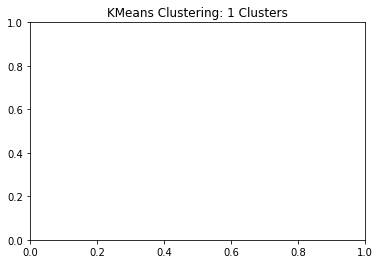

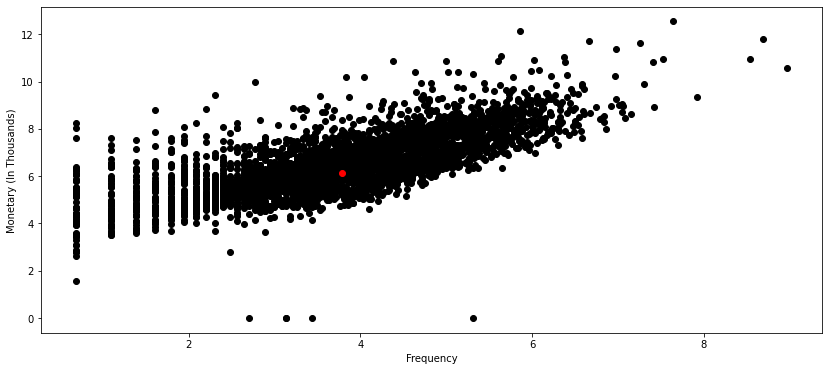

0.0


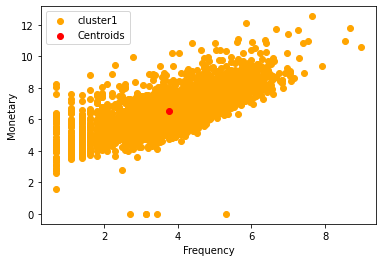

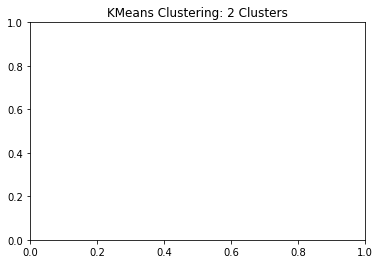

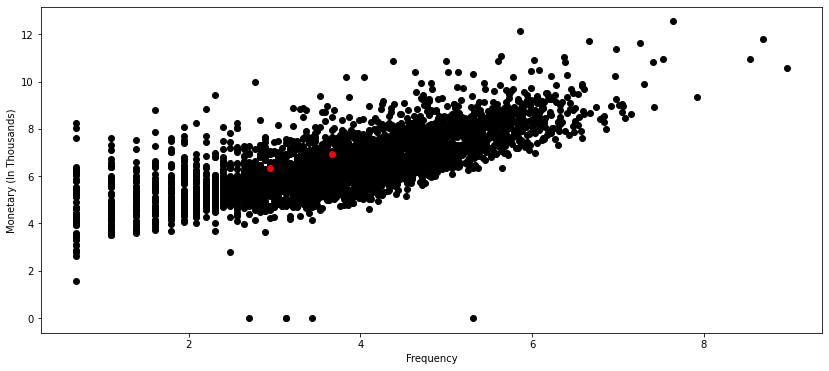

0.26957190810370557
0.16766473950461158
0.10173633903423651
0.05632480381460159
0.031742650363617564
0.02648864426205444
0.014141557086105205
0.0035370473807700975
0.003537566588916352
0.007078421996085105
0.00708077029382892
0.003540549979895946


KeyboardInterrupt: ignored

In [112]:
for i in range(1,8):
    plt.title('KMeans Clustering: {} Clusters'.format(i))
    kmeans(i,online_retail)

# **Conclusion**
**We can deduce the following steps required for performing K-Measns Clustering**

Step 1 - Specify the number K of clusters

Step 2 - Randomly initialize K centroids.

Step 3 - Assign all the points to the closest cluster centroid

Step 4 - Recompute the centroids of newly formed clusters

Step 5 - Repeat Steps 3 and 4

In the above figure we can see upto 7 clusters has been performed considering each data point


# **References**


1.   https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
2.   Refered Towards Data Science

The online retail dataset was used. Referred to the notebook shared by the professor to understand the concept of RFM. Towards Data Science and Analytics Vidhya has been referred inorder to understand more about how to generate model without using any libraries. I have also tried to produnce my own findings in terms of negative quantity and unit prices 

Copyright 2021 Ronak Bhushan Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE